In [1]:
#import os
#os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [1]:
import numpy as np
import pylab as pl
from matplotlib import pyplot
from pykalman import KalmanFilter
from utils.sequences_treatment import *
from utils.linear_systems import *

In [2]:
kf=loadKF()

In [3]:
numberSamples=1
T=5

In [4]:
(objectives,observations,_)=sampleKFSequence(kf,T,numberSamples=numberSamples)
print(objectives.shape)
print(observations.shape)
print(observations)

(1, 5, 1)
(1, 5, 1)
[[[ 6.88843628]
  [17.47066929]
  [21.60633038]
  [15.96857858]
  [12.99629304]]]


In [6]:
sigma=randomSigma(T,numberSamples=numberSamples,p0=0)
observations_corrupted=corruptKFSequence(observations,sigma)

In [7]:
filtered_objectives, objective_covariances, filtered_states, state_covariances=KFFilterAll(kf,observations_corrupted)

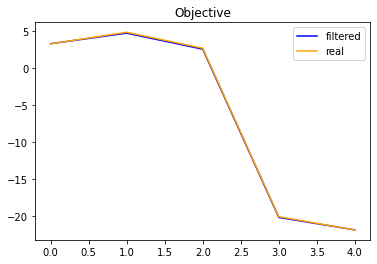

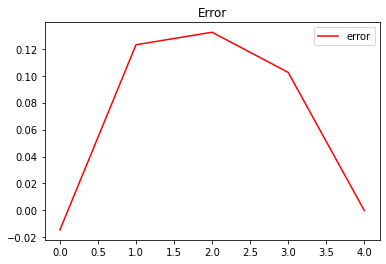

In [8]:
i=0
pyplot.title('Objective')
pyplot.plot(filtered_objectives[i,:], color='blue', label='filtered')
pyplot.plot(objectives[i,:], color='orange', label='real')
pyplot.legend()
pyplot.show()

pyplot.title('Error')
pyplot.plot(objectives[i,:]-filtered_objectives[i,:], color='red', label='error')
pyplot.legend()
pyplot.show()

In [9]:
filtered_state=None
filtered_state_covariance=None
for t in range(T):
    filtered_state,filtered_state_covariance,filtered_objective,filtered_objective_covariance=KFFilterOne(kf, observations_corrupted[0,t,:], state_mean=filtered_state, state_mean_covariance=filtered_state_covariance)
    print(filtered_state)

[ 3.32843657 -5.04100555]
[ 4.755102   -4.78228348]
[ 2.59085632 -5.17018564]
[-20.13255361 -12.31039923]
[-21.82431132 -12.49793449]
